<a href="https://www.kaggle.com/code/kristinakang/cyclistic-report?scriptVersionId=162094011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic

This is data analysis for _Cyclistic_, a bike-share company, in order to help them attract more riders while following the steps of the data analysis process: **Ask**, **Prepare**, **Process**, **Analyze**, **Share** and **Act**. 

The *goal* of the analysis is <ins>to maximize the number of annual memberships</ins>. The analysis will be useful when designing marketing strategies aimed at converting casual riders into annual members. 

The *question* assigned is <ins>how do casual riders and annual members use Cyclistic bikes differently?</ins>. The Cyclistic historical bike trip data is used to identify the trend.

## Scope of Work
| Phase | Key Tasks | Deliverable |
| ----------- | ----------- | ----------- |
| Ask | <ul><li>Identify the business task</li><li>Consider key stakeholders</li></ul> | A clear statement of the business task |
| Prepare | <ul><li>Download data and store it appropriately</li><li>Identify how it’s organized</li><li>Sort and filter the data</li><li>Determine the credibility of the data</li></ul> | A description of all data sources used |
| Process | <ul><li>Check the data for errors</li><li>Choose tools used</li><li>Transform the data</li><li>Document the cleaning process</li></ul> | Documentation of any cleaning or manipulation of data |
| Analyze | <ul><li>Aggregate the data so it’s useful and accessible</li><li>Organize and format the data</li><li>Perform calculations</li><li>Identify trends and relationships</li></ul> | A summary of the analysis |
| Share | <ul><li>Determine the best way to share the findings</li><li>Create effective data visualizations</li><li>Present your findings</li><li>Ensure the work is accessible</li></ul> | Supporting visualizations and key findings |
| Act | <ul><li>Finalize the conclusion</li><li>Think of ways to incorporate the insights into business decisions</li></ul> |  Top three recommendations based on the analysis |

## Business Background
Cyclistic: a bike-share programs with 5,824 bikes and 692 docking stations
- about 8% of riders use assistive bikes
- about 30% use the bokes to commute to work each day
- pricing plans:
    - casual riders
        - single-ride
        - full-day pass
    - Cyclistic members
        - annual membership

Lily Moreno: the directer of marketing and your manager.
- responsible for the development of campaigns and initiatives to promote Cyslistic
- including email, social media, etc

Cyclistsic marketing analytics team: a team of data analysts responsible for collecting, analyzing, and reporting data.

Cyclistic executive team: decide whether to approve the recced marketing program.

### Business task
How do annual members and casual riders use Cyclistic bikes differently?

## Sources of Data
I have used data from January 2023 to December 2023 to ensure reliability and credibility of the [data](https://divvy-tripdata.s3.amazonaws.com/index.html). The data has been made available by Motivate International Inc. under this [license](https://divvybikes.com/data-license-agreement).

### Credibility of the data

To ensure the reliability and quality of the dataset, we evaluate it based on the ROCCC criteria: Reliable, Original, Comprehensive, Current, and Cited.

| Criteria (score out of 10.0) | Description |
| ----------- | ----------- |
| Reliable (9.5) | The dataset is sourced from Lyft Bikes and Scooters, LLC, operating the Divvy bicycle sharing service in Chicago. While the license agreement supports the non-exclusive, limited, perpetual license for lawful purposes, it emphasizes that the data is provided "as is," influencing a slightly lower score. However, the data's association with a reputable organization contributes significantly to its reliability. |
| Original (10.0) | The dataset's origin is traced back to the Divvy service operated by Lyft Bikes and Scooters, LLC. The license agreement clearly defines the ownership and granted rights, ensuring the data's originality. The absence of data sublicensing further enhances the score, affirming the integrity of the source. |
| Comprehensive (9.0) | Since data-privacy issues prohibit from using riders’ personally identifiable information, the data's comprehensiveness is compromised. The score is contingent on the dataset's ability to address a wide range of relevant factors influencing bike-sharing trends. |
| Current (8.5) | The dataset spans a few previous years, aligning with the analysis request. However, additional clarity on the data's update frequency and relevance to the current timeframe is essential for a more precise assessment. The score reflects the adherence to the specified timeframe but leaves room for further confirmation. |
| Cited (9.5) | The data is made available by Motivate International Inc. under the license agreement. The agreement outlines conditions for usage, emphasizing proper citation in analyses, reports, or studies for non-commercial purposes. The dataset's credibility is bolstered by the acknowledgment of the source, contributing to its overall reliability. |

## Cleaning Data

### Preparing for manipulation of data

In [5]:
# load libraries required to perform analysis

library(ggplot2)

library(dplyr)

library(janitor)

print('Libraries successfully loaded.')


# import our data

jan <- read.csv("/kaggle/input/cyclistic-raw/202301.csv")

feb <- read.csv("/kaggle/input/cyclistic-raw/202302.csv")

mar <- read.csv("/kaggle/input/cyclistic-raw/202303.csv")

apr <- read.csv("/kaggle/input/cyclistic-raw/202304.csv")

may <- read.csv("/kaggle/input/cyclistic-raw/202305.csv")

jun <- read.csv("/kaggle/input/cyclistic-raw/202306.csv")

jul <- read.csv("/kaggle/input/cyclistic-raw/202307.csv")

aug <- read.csv("/kaggle/input/cyclistic-raw/202308.csv")

sep <- read.csv("/kaggle/input/cyclistic-raw/202309.csv")

oct <- read.csv("/kaggle/input/cyclistic-raw/202310.csv")

nov <- read.csv("/kaggle/input/cyclistic-raw/202311.csv")

dec <- read.csv("/kaggle/input/cyclistic-raw/202312.csv")

print('Data has been successfully loaded into data frames.')

[1] "Libraries successfully loaded."
[1] "Data has been successfully loaded into data frames."


### Inspecting Data

In [6]:
# check if all of the datasets contain the same number, types and names of columns

# TRUE means all the datasets share the same number, types and names of columns

# FALSE means otherwise

compare_df_cols_same(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

# print column names

colnames(jan)


# merge all data frames

trips2023 <- rbind(jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec)

print('Data has been successfully merged into one data frame.')



# inspect the merged data

# display internal structure of the object

str(trips2023)

[1] TRUE

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "Data has been successfully merged into one data frame."
'data.frame':	5719877 obs. of  13 variables:
 $ ride_id           : chr  "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-01-21 20:05:42" "2023-01-10 15:37:36" "2023-01-02 07:51:57" "2023-01-22 10:52:58" ...
 $ ended_at          : chr  "2023-01-21 20:16:33" "2023-01-10 15:46:05" "2023-01-02 08:05:11" "2023-01-22 11:01:44" ...
 $ start_station_name: chr  "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr  "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr  "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr  "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ star

### Manipulating Data

In [7]:
# delete 'start_station_name', 'start_station_id', 'end_station_name' and 'end_station_id'

# since they won't be necessary for our purposes

#trips2023 <- subset(trips2023, select = -c(start_station_name, start_station_id, end_station_name, end_station_id))

print('Unnecessary columns deleted successfully.')


# delete null values

null_val_one <- capture.output(sum(is.na(trips2023$end_lat)))

sprintf("There are %s null values in 'end_lat'", null_val_one)

null_val_two <- capture.output(sum(is.na(trips2023$end_lng)))

sprintf("There are %s null values in 'end_lng'", null_val_two)

trips2023 <- trips2023[!(is.na(trips2023$end_lat) | is.na(trips2023$end_lng)), ]

print('Data frame refined by deleting null values.')


# divide datetime column

trips2023$started_at = strptime(trips2023$started_at, "%Y-%m-%d %H:%M:%S")

trips2023$ended_at = strptime(trips2023$ended_at, "%Y-%m-%d %H:%M:%S")

print("Converted 'started_at' and 'ended_at' to the datetime type.")

trips2023$date <- as.Date(trips2023$started_at)

trips2023$month <- format(as.Date(trips2023$date), "%m")

trips2023$day <- format(as.Date(trips2023$date), "%d")

trips2023$day_of_week <- format(as.Date(trips2023$date), "%A")

print("Created new columns 'date', 'month', 'day' and 'day_of_week' out of 'started_at'.")

trips2023$ride_length <- difftime(trips2023$ended_at, trips2023$started_at)

print('Calculated ride_length for each ride.')


# delete negative ride length

trips2023 <- trips2023 %>% 
  filter(ride_length > 0)

print('Successfully deleted negative ride duration.')

[1] "Unnecessary columns deleted successfully."


[1] "There are [1] 6990 null values in 'end_lat'"

[1] "There are [1] 6990 null values in 'end_lng'"

[1] "Data frame refined by deleting null values."
[1] "Converted 'started_at' and 'ended_at' to the datetime type."
[1] "Created new columns 'date', 'month', 'day' and 'day_of_week' out of 'started_at'."
[1] "Calculated ride_length for each ride."
[1] "Successfully deleted negative ride duration."


# Analyzing data

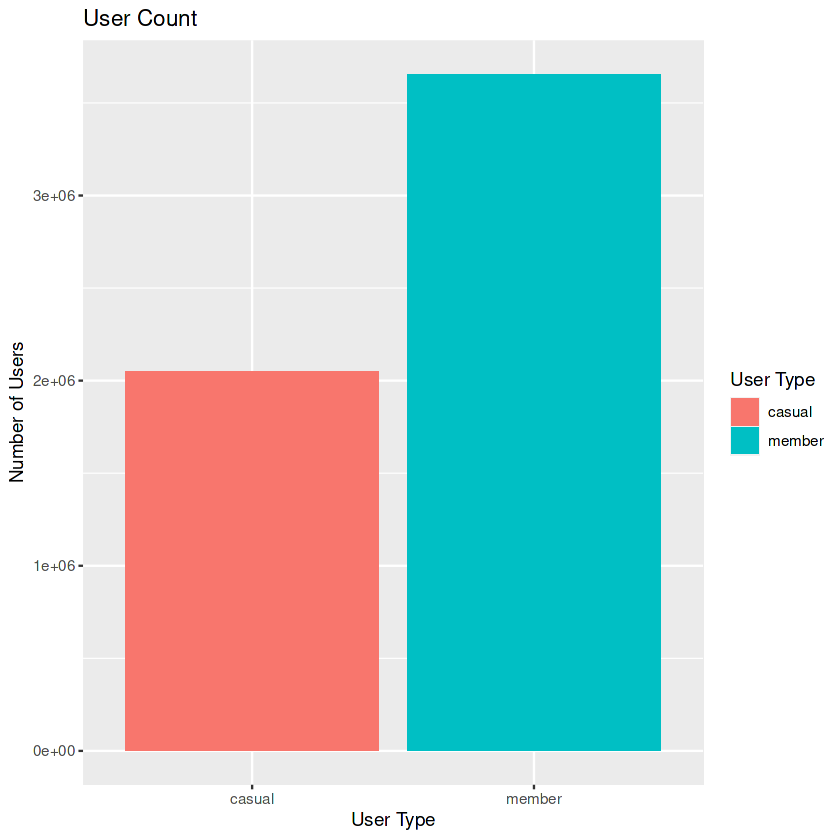

In [8]:
# user count

ggplot(trips2023, aes(member_casual, fill = member_casual)) + geom_bar() + labs(title = "User Count", x = 'User Type', y = 'Number of Users', fill = 'User Type')

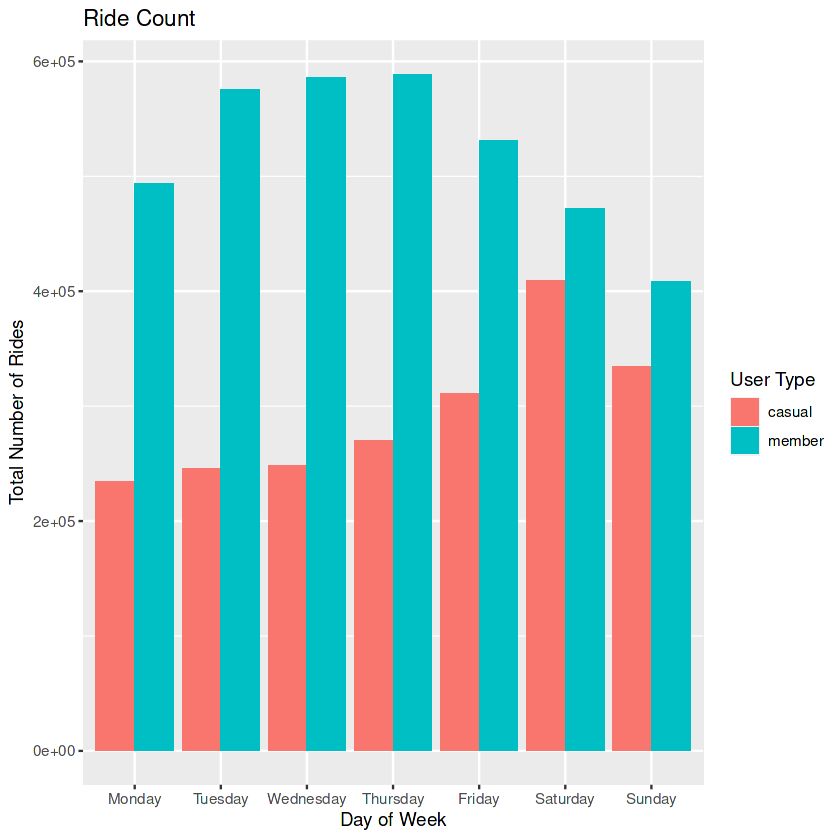

In [9]:
# total number of rides by day and user type

ggplot(trips2023, aes(factor(day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')), fill = member_casual)) + geom_bar(position = "dodge") +
    labs(title = 'Ride Count', x = 'Day of Week', y =  'Total Number of Rides', fill = 'User Type')

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


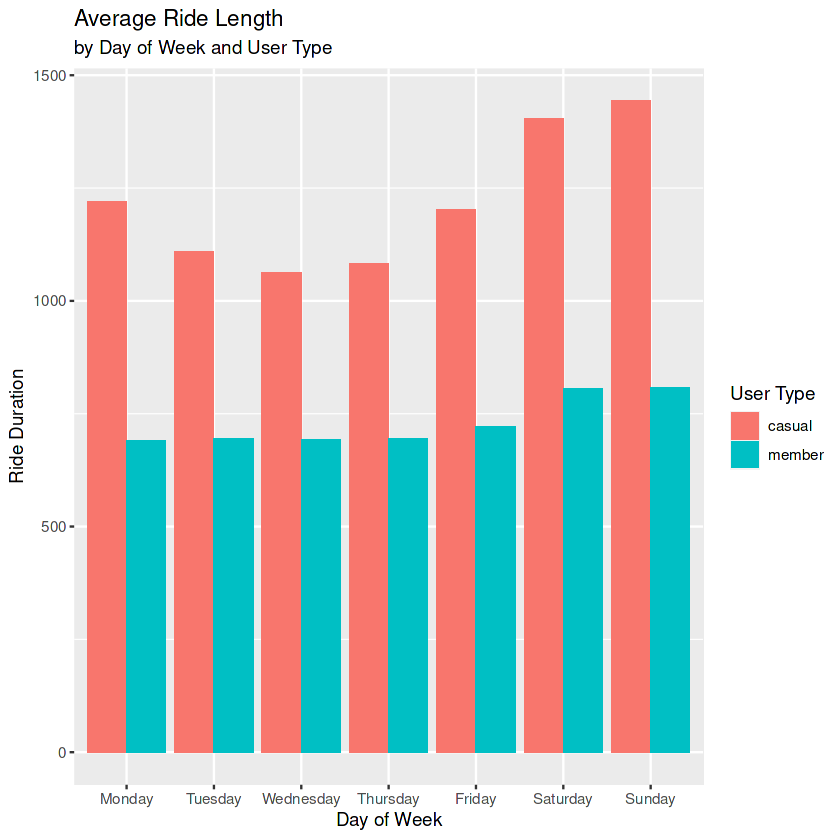

In [10]:
# average ride length by day and user type

summ1 <- trips2023 %>% 
  group_by(member_casual, day_of_week) %>% 
  summarize(average_ride_length = mean(ride_length, na.rm = TRUE))


ggplot(summ1, aes(factor(day_of_week, levels = c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')), average_ride_length, fill = member_casual)) + geom_bar(stat = 'identity', position = 'dodge') +
    labs(title = 'Average Ride Length', subtitle = 'by Day of Week and User Type', x = 'Day of Week', y = 'Ride Duration', fill = 'User Type')

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


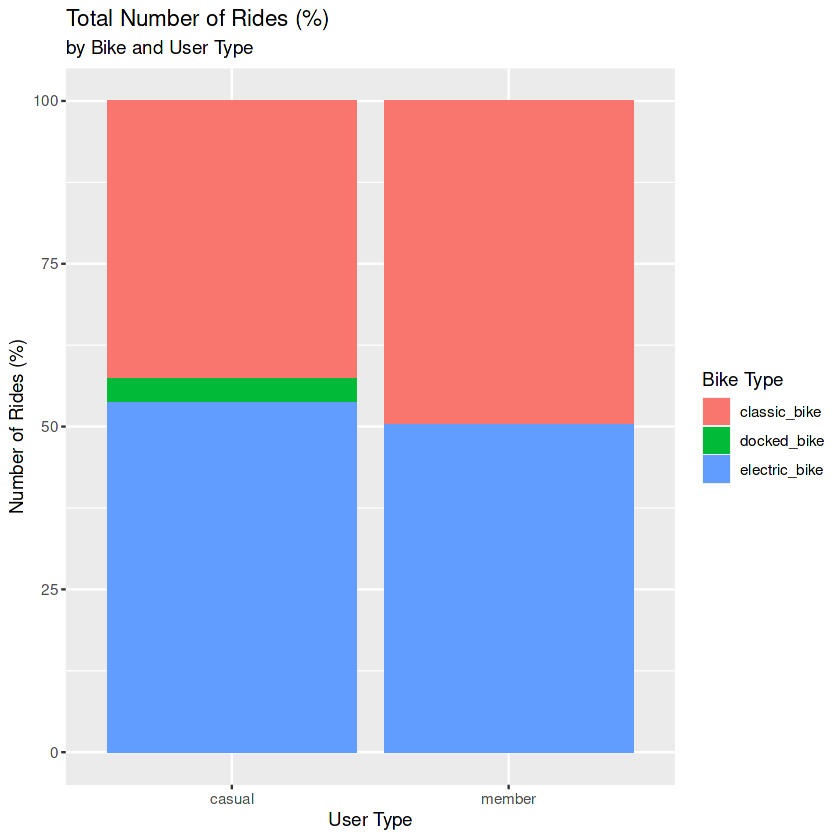

In [11]:
# total number of rides by bike and user type

summ2 <- trips2023 %>% 
  group_by(member_casual, rideable_type) %>% 
  summarize(total_num = n()) %>% 
  mutate(percentage = total_num * 100 / sum(total_num))


ggplot(summ2, aes(member_casual, percentage, fill = rideable_type)) + geom_bar(stat = 'identity') + 
    labs(title = 'Total Number of Rides (%)', subtitle = 'by Bike and User Type', x = 'User Type', y = 'Number of Rides (%)', fill = 'Bike Type')

**Tableau's version of the graphs can be found [here](https://public.tableau.com/views/Cyclistic_17056977285450/CaseStudy1-Cyclistic?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link).**

# Key Findings

## User Demographics

- Annual membership surpasses casual rider numbers.
- Annual members exhibit a weekday-centric usage pattern, contrasting with casual riders who show heightened weekend activity.
- Casual riders tend to engage in longer-duration trips, particularly noticeable during weekends.
- Both user segments demonstrate extended trip durations during Summer, juxtaposed with shorter durations during Winter.

## Geographical Patterns

- Casual riders frequently opt for routes along Lake Michigan's coastline during weekends, indicative of leisure-oriented riding.
- In contrast, members predominantly utilize bikes for weekday commuting in urban areas.

These findings underscore the nuanced usage disparities between annual members and casual riders, alongside discernible geographical preferences. This empirical understanding serves as a cornerstone for devising sophisticated marketing strategies aimed at fostering the conversion of casual riders into annual members, thereby optimizing user engagement and retention.

# Proposed Business Plans

1. **Weekday Convenience, Weekend Adventure** *(Targeted Marketing)*:

    Targeted marketing campaigns aimed at increasing weekday ridership among annual members by 15% and boosting weekend usage among casual riders by 20%.

2. **Capitalizing on Peaks, Boosting in Valleys** *(Seasonal Promotions)*:

    Implementation of seasonal promotions to increase annual memberships by 25% during peak months and boost overall ridership among casual riders by 20% during off-peak periods.

3. **Coastal Conservation Collaboration** *(Geographically Tailored Strategy)*:

    Leveraging partnerships with Chicago Wilderness Alliance to support an eco-friendly initiative, Green Vision Initiatives, contributing to environmental conservation efforts.
    For every bike rental made through Cyclistic's platform during weekends along the Lake Michigan coast,5% of the proceeds are donated to Green Vision Initiatives, funding eco-friendly projects.

